In [21]:
import pandas as pd
import numpy as np

csv_scrap_file = pd.read_csv('data/raw/scrapping_data.csv')
csv_api_file = pd.read_csv('data/raw/api_data.csv')

In [4]:
csv_scrap_file.head()

,job_link,job_title,job_company,job_location,job_contract,job_level,job_salary,job_salary_mean,job_tags,job_perks_and_benefits
0,https://aijobs.net/job/1307721-stagiaire-ingen...,Stagiaire Ingénieur(e) R&D (H/F) Simulation nu...,GE Vernova,"Villeurbanne, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,Python;R;R&D,NaN
1,https://aijobs.net/job/1307599-responsable-dev...,Responsable développement IA Générative junior,Everience Benelux,"Courbevoie, IDF, France",Full Time,Entry-level / Junior,EUR 27K - 63K *,45.0,APIs;Azure;LangChain;LLMs;OpenAI;Python;RAG,NaN
2,https://aijobs.net/job/1307534-data-engineer/,Data Engineer,Sorare,Paris,Full Time,NaN,EUR 69K - 129K *,99.0,Agile;Airflow;AWS;BigQuery;Business Intelligen...,Fitness / gym;Flex vacation;Gear;Health care;I...
3,https://aijobs.net/job/1307455-it-business-dat...,IT Business Data Scientist – Business Assurance,SGS,"Arcueil, IDF, France",Full Time,Mid-level / Intermediate,EUR 72K - 135K *,103.5,Data management;Data Mining;Machine Learning;P...,Career development;Flex hours;Health care
4,https://aijobs.net/job/1307362-ai-product-owner/,AI Product Owner,Diabolocom,Paris,Full Time,Mid-level / Intermediate,EUR 61K - 113K *,87.0,Agile;APIs;Data analysis;Engineering;Machine L...,Career development;Flex hours;Team events


In [5]:
csv_api_file.head()


,job_link,job_title,job_company,job_location,job_contract,job_hours,job_level,job_salary
0,https://candidat.francetravail.fr/offres/reche...,OPERATEUR PRODUCTION POLYVALENT H/F,NaN,62 - Blendecques,CDD - 3 Mois,35,Débutant accepté,21840.00
1,https://candidat.francetravail.fr/offres/reche...,PREPARATEUR DE COMMANDES DRIVE (H/F),NaN,28 - Chartres,Intérim - 1 Mois,35,Débutant accepté,21621.60
2,https://candidat.francetravail.fr/offres/reche...,TECHNICIEN LABORATOIRE (H/F),NaN,28 - Chartres,Intérim - 10 Mois,36,2 An(s),22464.00
3,https://candidat.francetravail.fr/offres/reche...,PREPARATEUR DE COMMANDES DRIVE (H/F),NaN,28 - Mainvilliers,Intérim - 1 Mois,35,Débutant accepté,21621.60
4,https://candidat.francetravail.fr/offres/reche...,REGLEUR MACHINISTE (H/F),NaN,28 - Illiers-Combray,Intérim - 10 Mois,37,2 An(s),22857.12


In [20]:
# Jobs in Paris compared to everywhere else in France
paris_scrap = csv_scrap_file[csv_scrap_file['job_location'].str.contains('Paris', na=False)]
paris_scrap.shape

(18, 10)

In [18]:
paris_api = csv_api_file[csv_api_file['job_location'].str.contains('Paris', na=False)]
paris_api.head()

,job_link,job_title,job_company,job_location,job_contract,job_hours,job_level,job_salary


## Concat les données dans un seul fichier

In [23]:
def convert_salary(s):
    if s == 'NaN' or pd.isnull(s):
        return np.nan
    try:
        # Convertir la chaîne en float
        val = float(s)
        # Multiplier par 1000 et convertir en int
        return int(val * 1000)
    except:
        return np.nan

csv_scrap_file['job_annual_salary'] = csv_scrap_file['job_salary_mean'].apply(convert_salary)
csv_scrap_file.head()

,job_link,job_title,job_company,job_location,job_contract,job_level,job_salary,job_salary_mean,job_tags,job_perks_and_benefits,job_annual_salary
0,https://aijobs.net/job/1307721-stagiaire-ingen...,Stagiaire Ingénieur(e) R&D (H/F) Simulation nu...,GE Vernova,"Villeurbanne, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,Python;R;R&D,NaN,NaN
1,https://aijobs.net/job/1307599-responsable-dev...,Responsable développement IA Générative junior,Everience Benelux,"Courbevoie, IDF, France",Full Time,Entry-level / Junior,EUR 27K - 63K *,45.0,APIs;Azure;LangChain;LLMs;OpenAI;Python;RAG,NaN,45000.0
2,https://aijobs.net/job/1307534-data-engineer/,Data Engineer,Sorare,Paris,Full Time,NaN,EUR 69K - 129K *,99.0,Agile;Airflow;AWS;BigQuery;Business Intelligen...,Fitness / gym;Flex vacation;Gear;Health care;I...,99000.0
3,https://aijobs.net/job/1307455-it-business-dat...,IT Business Data Scientist – Business Assurance,SGS,"Arcueil, IDF, France",Full Time,Mid-level / Intermediate,EUR 72K - 135K *,103.5,Data management;Data Mining;Machine Learning;P...,Career development;Flex hours;Health care,103500.0
4,https://aijobs.net/job/1307362-ai-product-owner/,AI Product Owner,Diabolocom,Paris,Full Time,Mid-level / Intermediate,EUR 61K - 113K *,87.0,Agile;APIs;Data analysis;Engineering;Machine L...,Career development;Flex hours;Team events,87000.0


In [29]:
csv_api_file['job_annual_salary'] = csv_api_file['job_salary']
data = pd.concat([csv_scrap_file, csv_api_file], ignore_index=True)

data.head()

,job_link,job_title,job_company,job_location,job_contract,job_level,job_salary,job_salary_mean,job_tags,job_perks_and_benefits,job_annual_salary,job_hours
0,https://aijobs.net/job/1307721-stagiaire-ingen...,Stagiaire Ingénieur(e) R&D (H/F) Simulation nu...,GE Vernova,"Villeurbanne, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,Python;R;R&D,NaN,NaN,NaN
1,https://aijobs.net/job/1307599-responsable-dev...,Responsable développement IA Générative junior,Everience Benelux,"Courbevoie, IDF, France",Full Time,Entry-level / Junior,EUR 27K - 63K *,45.0,APIs;Azure;LangChain;LLMs;OpenAI;Python;RAG,NaN,45000.0,NaN
2,https://aijobs.net/job/1307534-data-engineer/,Data Engineer,Sorare,Paris,Full Time,NaN,EUR 69K - 129K *,99.0,Agile;Airflow;AWS;BigQuery;Business Intelligen...,Fitness / gym;Flex vacation;Gear;Health care;I...,99000.0,NaN
3,https://aijobs.net/job/1307455-it-business-dat...,IT Business Data Scientist – Business Assurance,SGS,"Arcueil, IDF, France",Full Time,Mid-level / Intermediate,EUR 72K - 135K *,103.5,Data management;Data Mining;Machine Learning;P...,Career development;Flex hours;Health care,103500.0,NaN
4,https://aijobs.net/job/1307362-ai-product-owner/,AI Product Owner,Diabolocom,Paris,Full Time,Mid-level / Intermediate,EUR 61K - 113K *,87.0,Agile;APIs;Data analysis;Engineering;Machine L...,Career development;Flex hours;Team events,87000.0,NaN


## Comparer les annonces entre Paris et les autres villes en France :
On peut voir que l'api de France Travail ne retourne aucunes annonces dans Paris malheureusement.
On devra donc utiliser les données du scrapping de IAJobs pour comparer.

In [30]:
paris_data = data[data['job_location'].str.contains('Paris', na=False)]
not_paris_data = data[~data['job_location'].str.contains('Paris', na=False)]
paris_data

,job_link,job_title,job_company,job_location,job_contract,job_level,job_salary,job_salary_mean,job_tags,job_perks_and_benefits,job_annual_salary,job_hours
2,https://aijobs.net/job/1307534-data-engineer/,Data Engineer,Sorare,Paris,Full Time,NaN,EUR 69K - 129K *,99.0,Agile;Airflow;AWS;BigQuery;Business Intelligen...,Fitness / gym;Flex vacation;Gear;Health care;I...,99000.0,NaN
4,https://aijobs.net/job/1307362-ai-product-owner/,AI Product Owner,Diabolocom,Paris,Full Time,Mid-level / Intermediate,EUR 61K - 113K *,87.0,Agile;APIs;Data analysis;Engineering;Machine L...,Career development;Flex hours;Team events,87000.0,NaN
5,https://aijobs.net/job/1307244-senior-ai-engin...,Senior AI Engineer – Orchestration & Agentic S...,H Company,Paris,Full Time,Senior-level / Expert,EUR 101K - 188K *,144.5,APIs;Architecture;Engineering;LLMs;Prompt engi...,Career development;Competitive pay;Equity / st...,144500.0,NaN
7,https://aijobs.net/job/1306937-data-analyst-in...,Data Analyst Intern,Match Group,"Paris, France",Internship,Entry-level / Junior,NaN,NaN,Agile;Data analysis;Data quality;Data visualiz...,Career development;Conferences;Flex hours;Lunc...,NaN,NaN
8,https://aijobs.net/job/1306662-data-scientist/,Data Scientist,Mediagenix,Paris,Full Time,Mid-level / Intermediate,EUR 72K - 135K *,103.5,AWS;Big Data;CI/CD;Databricks;Data pipelines;D...,Career development;Flex hours;Flex vacation;Ge...,103500.0,NaN
21,https://aijobs.net/job/1305277-stage-assistant...,Stage - Assistant Portfolio Management - Juill...,Sienna Investment Managers,"Paris, IDF, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,Finance;Power BI;Python;SQL,NaN,NaN,NaN
23,https://aijobs.net/job/1304934-senior-back-end...,Senior Back-End Engineer (NodeJs),Blackfluo.ai,"Paris, France",Full Time,Senior-level / Expert,EUR 95K - 177K *,136.0,API Development;APIs;Engineering;Kubernetes;Ma...,NaN,136000.0,NaN
24,https://aijobs.net/job/1304762-machine-learnin...,Machine Learning Image Engineer,Blackfluo.ai,"Paris, France",Full Time,Mid-level / Intermediate,EUR 79K - 148K *,113.5,Computer Vision;Docker;Engineering;LLMs;Machin...,NaN,113500.0,NaN
28,https://aijobs.net/job/1300841-agentic-platfor...,Agentic Platform Team Lead - @Entalpic,Breega,"Paris, France",Full Time,Senior-level / Expert,EUR 41K - 95K *,68.0,APIs;Architecture;AWS;Chemistry;CI/CD;Data pip...,Career development;Competitive pay;Equity / st...,68000.0,NaN
29,https://aijobs.net/job/1300692-data-engineer-s...,Data Engineer - Stage 6 mois,Brut.,"Paris, France",Full Time,Entry-level / Junior,EUR 55K - 103K *,79.0,Architecture;AWS;Azure;CI/CD;GCP;Pipelines;Python,NaN,79000.0,NaN


In [31]:
not_paris_data

,job_link,job_title,job_company,job_location,job_contract,job_level,job_salary,job_salary_mean,job_tags,job_perks_and_benefits,job_annual_salary,job_hours
0,https://aijobs.net/job/1307721-stagiaire-ingen...,Stagiaire Ingénieur(e) R&D (H/F) Simulation nu...,GE Vernova,"Villeurbanne, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,Python;R;R&D,NaN,NaN,NaN
1,https://aijobs.net/job/1307599-responsable-dev...,Responsable développement IA Générative junior,Everience Benelux,"Courbevoie, IDF, France",Full Time,Entry-level / Junior,EUR 27K - 63K *,45.0,APIs;Azure;LangChain;LLMs;OpenAI;Python;RAG,NaN,45000.0,NaN
3,https://aijobs.net/job/1307455-it-business-dat...,IT Business Data Scientist – Business Assurance,SGS,"Arcueil, IDF, France",Full Time,Mid-level / Intermediate,EUR 72K - 135K *,103.5,Data management;Data Mining;Machine Learning;P...,Career development;Flex hours;Health care,103500.0,NaN
6,https://aijobs.net/job/1306943-assistant-data-...,Assistant Data Analyst (Rempl Noam) - ALTERNANCE,Maisons du Monde,"MDM / PARIS 55 AMSTERDAM, France",Full Time;Internship,Entry-level / Junior,NaN,NaN,BigQuery;Excel;GCP;Google Cloud;Python;QlikView,Salary bonus,NaN,NaN
9,https://aijobs.net/job/1306519-data-scientist-...,Data scientist confirmé - H/F,Scalian,"Neuilly-sur-Seine, IDF, France",Full Time,Senior-level / Expert,EUR 87K - 162K *,124.5,Agile;Architecture;Confluence;DevOps;Git;Jira;...,NaN,124500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://candidat.francetravail.fr/offres/reche...,Technicien de Maintenance Frigoriste,NaN,95 - Roissy-en-France,Intérim - 8 Mois,1 An(s),22000.0,NaN,NaN,NaN,22000.0,35.0
196,https://candidat.francetravail.fr/offres/reche...,Technicien de maintenance H/F,NaN,59 - Maubeuge,CDD - 6 Mois,Débutant accepté,24000.0,NaN,NaN,NaN,24000.0,35.0
197,https://candidat.francetravail.fr/offres/reche...,Tourneur Fraiseur H/F,NaN,59 - Jeumont,CDI,2 An(s),24720.0,NaN,NaN,NaN,24720.0,40.0
198,https://candidat.francetravail.fr/offres/reche...,Cariste en préparation logistique F/H,NaN,24 - Périgueux,Intérim - 4 Mois,1 An(s),21622.0,NaN,NaN,NaN,21622.0,35.0


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

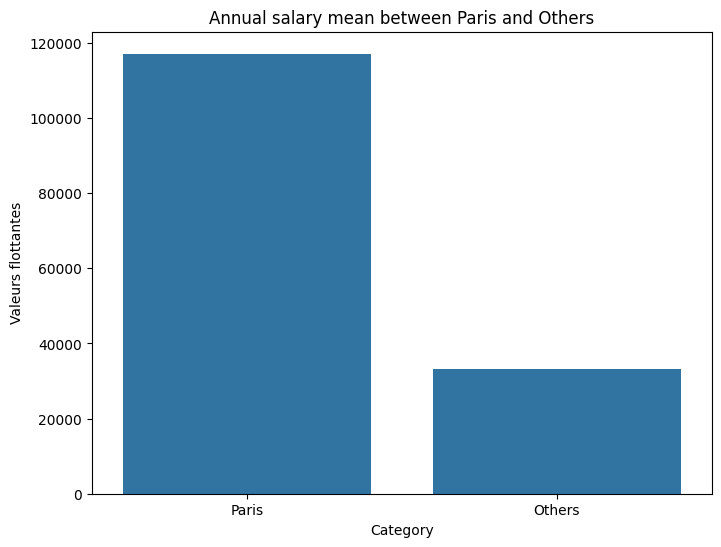

In [56]:
categories = ['Paris', 'Others']
data1 = paris_data['job_annual_salary'].mean()
data2 = not_paris_data['job_annual_salary'].mean()

paris_datas = pd.DataFrame({
    'Category': categories,
    'Values': [data1, data2]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Values', data=paris_datas)
plt.ylabel('Valeurs flottantes')
plt.title('Annual salary mean between Paris and Others')
plt.show()

### On peut voir que la moyenne des salaires annuelles est plus élevée entre Paris et les autres villes.